In [201]:
import torch 
from gsplat import rasterization
import matplotlib.pyplot as plt
import pycolmap
import numpy as np
from src.geometry.point_transformation_pt import get_intrinsic_opengl_params

In [202]:
recon = pycolmap.Reconstruction("../data/south-building/0")

In [203]:
device="cuda:0" if torch.cuda.is_available() else "cpu"

In [204]:
cam = recon.cameras[1]
width, height = cam.width, cam.height

In [205]:
f, cx, cy = cam.params
intrinsic_matrix = torch.tensor(np.array([[f, 0., cx], [0., f, cy], [0, 0., 1.]]), device=device, dtype=torch.float32)[None, :, :]

In [206]:
intrinsic_matrix.shape

torch.Size([1, 3, 3])

In [207]:
img = recon.images[100]
img_cam = img.cam_from_world

In [208]:
w2c = torch.tensor(np.concatenate([img_cam.matrix(), np.array([[0.0, 0., 0., 1.]])]), device=device).type(torch.float32)[None, :, :]

# Convert extrinsics to camera-to-world.
# camtoworld = torch.tensor(torch.linalg.inv(w2c), device=device)[None, :, :]

In [209]:
device

'cuda:0'

In [210]:
model_path = "../results/south-building/ckpts/ckpt_29999_rank0.pt"
g_model = torch.load(model_path, map_location=device, weights_only=True)

In [211]:
g_model['splats'].keys()

odict_keys(['means', 'opacities', 'quats', 'scales', 'sh0', 'shN'])

In [212]:
viewmats = torch.eye(4, device=device)[None, :, :]
Ks = torch.tensor([
   [300., 0., 150.], [0., 300., 100.], [0., 0., 1.]], device=device)[None, :, :]

In [213]:
n = len(g_model['splats']['means'])
means = g_model['splats']['means'][:n]
quats = g_model['splats']['quats'][:n]
opacities = torch.sigmoid(g_model['splats']['opacities'][:n])
scales = torch.exp(g_model['splats']['scales'][:n])
sh0 = g_model['splats']['sh0'][:n]

In [214]:
colors = torch.cat([g_model['splats']["sh0"], g_model['splats']["shN"]], 1)[:n]

In [215]:
means.type()

'torch.cuda.FloatTensor'

In [216]:
rendered_colors, rendered_alphas, meta = rasterization(
   means=means, quats=quats, scales=scales, opacities=opacities, 
    colors=colors, viewmats=w2c, Ks=intrinsic_matrix, width=width, height=height, sh_degree=0
)

In [217]:
rendered_colors

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         ...,

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.1055, 0.1047, 0.1101],
          [0.0989, 0.0981, 0.1032],
          [0.0928, 0.0919, 0.0968]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000

In [218]:
rendered_colors.shape

torch.Size([1, 2304, 3072, 3])

In [219]:
height

2304

In [220]:
rendered_alphas[0].mean()

tensor(0.4955, device='cuda:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.7189279].


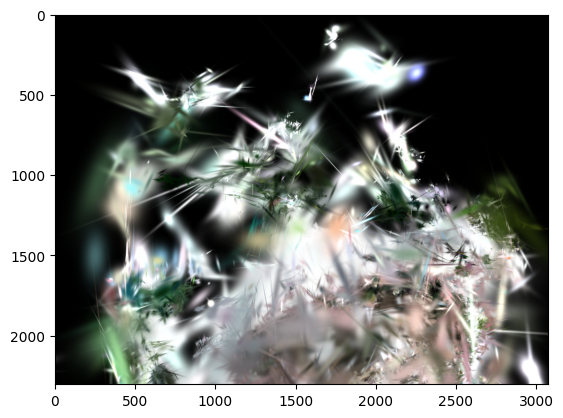

In [221]:
plt.imshow(rendered_colors.cpu().numpy()[0])

In [222]:
w2c = np.concatenate([img_cam.matrix(), bottom])

w2c_mats = np.stack(w2c_mats, axis=0)

# Convert extrinsics to camera-to-world.
camtoworlds = np.linalg.inv(w2c_mats)

NameError: name 'bottom' is not defined